# ETUDE CLINIQUE

### KMeans - Kmodes - CAH - Regles d association

#### Groupe:
* Yulia Kalugina
* Ricardo Vallejo
---

- Proprocess, nettoyage et traitement de null values

- Variables categoriales avec dummies  + Variables numericas sont normalises et standarises

- KMeans clasique et evaluation de clusters

- Clustering ou prediction

- Convertion a variables categorial en basses a la median de tous les variables 
  numeriques pour appliquer KModes
  
- Descripsion de clusters et centroids.

- Regles d association
     - https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c
     - https://pbpython.com/market-basket-analysis.html
  

Association rules are normally written like this: {Diapers} -> {Beer} which means that there is a strong relationship
    between customers that purchased diapers and also purchased beer in the same transaction.

In the above example, the {Diaper} is the antecedent and the {Beer} is the consequent. Both antecedents and consequents 
can have multiple items. In other words, {Diaper, Gum} -> {Beer, Chips} is a valid rule.

Support is the relative frequency that the rules show up. In many instances, you may want to look for high support in
order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are 
trying to find “hidden” relationships.

Confidence is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% 
of the cases where Diaper and Gum were purchased, the purchase also included Beer and Chips. For product recommendation, 
a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.

Lift is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). 
The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 
are generally more “interesting” and could be indicative of a useful rule pattern

# Projet de Session: Etude Clinique

Le projet est consacré à l'étude d'essai clinique dans le but de déterminer s'il y a une amélioration de l'état de santé du groupe d'individus qui prennent le médicament par rapport au placebo. Le variables SCOREBINLDL16sem (mauvais cholesterol, Score LDL) et SCOREBINTG16sem (Triglycerides, Score TG) sont les variables clé. 
Les variables indiquées _BL sont les taux de variables biologiques initiaux des individus (élevés (H) ou bas (L)).

A high triglyceride level combined with high LDL (bad) cholesterol is linked with fatty buildups within the artery walls, which increases the risk of heart attack and stroke.

### Objectif:
- Trouver des groupes d’individus pour lesquels le score LDL est bon.
- Trouver des groupes d’individus pour lesquels le score TG est bon.
- Influence du sexe ou de l’âge?


In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
pd.set_option('display.max_colwidth', None)

## 1. Exploration des donnees

In [2]:
# chargement des données
data = pd.read_csv("Projet_clinique_Aut21.csv", delimiter=";", decimal = ",")
# faire une copie
df = data.copy()
df.head()

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
0,43,Placebo,F,22.3,0.59,1.4082,0.57,6.0,0.25,13.8,6.5,MAUVAIS,BON
1,55,Drug,F,23.7,0.51,1.9100,0.65,6.6,0.18,11.4,7.9,BON,MAUVAIS
2,49,Placebo,F,21.7,0.65,2.0520,0.79,6.6,0.25,15.6,5.8,MAUVAIS,MAUVAIS
3,40,Placebo,F,23.8,0.43,1.8878,1.87,6.6,0.26,12.0,3.6,MAUVAIS,BON
4,44,Drug,F,22.1,0.57,1.2507,0.90,7.8,0.35,17.4,6.2,BON,BON


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                138 non-null    int64  
 1   TRAITTEST          138 non-null    object 
 2   SEX                138 non-null    object 
 3   BMI                138 non-null    float64
 4   HDLBL              138 non-null    float64
 5   LDLBL              138 non-null    float64
 6   TGBL               138 non-null    float64
 7   ALATBL             138 non-null    float64
 8   GGT(microkat/L)BL  123 non-null    float64
 9   ASATBL             138 non-null    float64
 10  BilirubineBL       138 non-null    float64
 11  SCOREBINLDL16sem   138 non-null    object 
 12  SCOREBINTG16sem    138 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 14.1+ KB


- Le dataFrame contiens 138 individus et 13 variables. 
- TRAITTEST, SEX , SCOREBINLDL16sem et SCOREBINTG16sem sont les variables categoriels, les autres variables: numeriques.


In [4]:
df.groupby('TRAITTEST')['SCOREBINLDL16sem'].value_counts()

TRAITTEST  SCOREBINLDL16sem
Drug       BON                 50
           MAUVAIS             18
Placebo    MAUVAIS             56
           BON                 14
Name: SCOREBINLDL16sem, dtype: int64

In [5]:
df.groupby('TRAITTEST')['SCOREBINTG16sem'].value_counts()

TRAITTEST  SCOREBINTG16sem
Drug       MAUVAIS            43
           BON                25
Placebo    MAUVAIS            48
           BON                22
Name: SCOREBINTG16sem, dtype: int64

In [6]:
df['SEX'].value_counts()

F    97
M    41
Name: SEX, dtype: int64

- On voi ici deja que le Score LDL est meiux considerablement pour les individus qui prennent le Drug et que Score LDL est mauvais pour ce qui  prennent Placebo.
- Il y a 2 fois plus des FEMMES que les HOMMES dans tout les donnees

## 2. Transformation des donnees

### 2.1. Detection de valeurs manquants

In [7]:
print(df.isnull().sum())

AGE                   0
TRAITTEST             0
SEX                   0
BMI                   0
HDLBL                 0
LDLBL                 0
TGBL                  0
ALATBL                0
GGT(microkat/L)BL    15
ASATBL                0
BilirubineBL          0
SCOREBINLDL16sem      0
SCOREBINTG16sem       0
dtype: int64


- il y a les valuers manquantes dans la colonne 'GGT(microkat/L)BL'

### Visualisation de colonne 'GGT(microkat/L)BL'

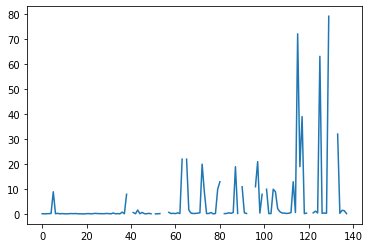

In [8]:
df['GGT(microkat/L)BL'].plot()
None

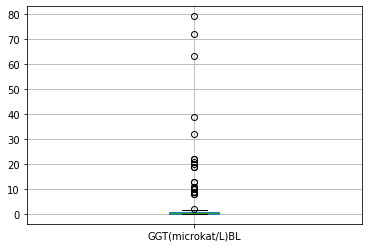

In [9]:
#Boxplot
df.boxplot(column='GGT(microkat/L)BL')
None

- Sur le box plot les rondes sont des valuers abberantes (outliers). La quantite des ces outliers est grande. Donc peut etre c'est les vrais valuers et on va les garder.
- Pour les 15 valeurs manquantes on va faire imputing avec le median (distribution pas symmetric):

In [11]:
df.dropna(inplace=True)

In [13]:
print('Verification valuers manquants \n')
print(df.isnull().sum())

Verification valuers manquants 

AGE                  0
TRAITTEST            0
SEX                  0
BMI                  0
HDLBL                0
LDLBL                0
TGBL                 0
ALATBL               0
GGT(microkat/L)BL    0
ASATBL               0
BilirubineBL         0
SCOREBINLDL16sem     0
SCOREBINTG16sem      0
dtype: int64


### 2.2. On fransforme les variables categoriels: 'TRAITTEST', 'SCOREBINLDL16sem', 'SEX', 'SCOREBINTG16sem' en numerique

In [14]:
df1=pd.get_dummies(df['TRAITTEST'])
df2=pd.get_dummies(df['SCOREBINLDL16sem'],prefix=['SCOREBINLDL16sem'])
df3=pd.get_dummies(df['SCOREBINTG16sem'],prefix=['SCOREBINTG16sem'])
df4=pd.get_dummies(df['SEX'],prefix=['sex'])
df_num=df.drop(columns=['TRAITTEST', 'SCOREBINLDL16sem', 'SEX', 'SCOREBINTG16sem'])
print('DataFrame avec variables numeriques seulement')
df_num.head()

DataFrame avec variables numeriques seulement


,AGE,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL
0,43,22.3,0.59,1.4082,0.57,6.0,0.25,13.8,6.5
1,55,23.7,0.51,1.9100,0.65,6.6,0.18,11.4,7.9
2,49,21.7,0.65,2.0520,0.79,6.6,0.25,15.6,5.8
3,40,23.8,0.43,1.8878,1.87,6.6,0.26,12.0,3.6
4,44,22.1,0.57,1.2507,0.90,7.8,0.35,17.4,6.2


In [15]:
df_num=pd.concat([df_num,df1['Drug'],df2["['SCOREBINLDL16sem']_MAUVAIS"],df3["['SCOREBINTG16sem']_MAUVAIS"],df4["['sex']_M"]], axis=1)
df_num.head()

,AGE,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,Drug,['SCOREBINLDL16sem']_MAUVAIS,['SCOREBINTG16sem']_MAUVAIS,['sex']_M
0,43,22.3,0.59,1.4082,0.57,6.0,0.25,13.8,6.5,0,1,0,0
1,55,23.7,0.51,1.9100,0.65,6.6,0.18,11.4,7.9,1,0,1,0
2,49,21.7,0.65,2.0520,0.79,6.6,0.25,15.6,5.8,0,1,1,0
3,40,23.8,0.43,1.8878,1.87,6.6,0.26,12.0,3.6,0,1,0,0
4,44,22.1,0.57,1.2507,0.90,7.8,0.35,17.4,6.2,1,0,0,0


### 2.3. Normalisation des donnees

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [17]:
#sc = StandardScaler()
sc = RobustScaler()

    * J'utilise RobustScaler parce que il y a des valuers avec des outliers.

In [18]:
df0_std = sc.fit_transform(df_num)
df0_std = pd.DataFrame(df0_std, columns = df_num.columns, index = df_num.index)
df0_std.head()

,AGE,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,Drug,['SCOREBINLDL16sem']_MAUVAIS,['SCOREBINTG16sem']_MAUVAIS,['sex']_M
0,-0.482759,-0.363636,0.047619,-0.733333,-0.390244,-0.974359,-0.202899,-0.743158,-0.558140,0.0,0.0,-1.0,0.0
1,0.344828,0.145455,-0.333333,0.956229,-0.195122,-0.923077,-0.304348,-1.164211,-0.232558,1.0,-1.0,0.0,0.0
2,-0.068966,-0.581818,0.333333,1.434343,0.146341,-0.923077,-0.202899,-0.427368,-0.720930,0.0,0.0,0.0,0.0
3,-0.689655,0.181818,-0.714286,0.881481,2.780488,-0.923077,-0.188406,-1.058947,-1.232558,0.0,0.0,-1.0,0.0
4,-0.413793,-0.436364,-0.047619,-1.263636,0.414634,-0.820513,-0.057971,-0.111579,-0.627907,1.0,-1.0,-1.0,0.0


In [19]:
df0_std.describe()

,AGE,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,Drug,['SCOREBINLDL16sem']_MAUVAIS,['SCOREBINTG16sem']_MAUVAIS,['sex']_M
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,-0.176058,0.047894,0.055749,0.050965,0.334127,0.192837,6.301284,0.268472,0.221403,0.495935,-0.479675,-0.300813,0.284553
std,0.666672,0.709596,0.753533,0.823542,0.965885,0.975564,18.121474,1.100594,0.964317,0.502028,0.501630,0.460487,0.453047
min,-2.206897,-1.527273,-1.190476,-2.808081,-0.829268,-0.974359,-0.333333,-2.111579,-1.255814,0.000000,-1.000000,-1.000000,0.000000
25%,-0.655172,-0.472727,-0.523810,-0.449495,-0.317073,-0.461538,-0.173913,-0.427368,-0.372093,0.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.344828,0.527273,0.476190,0.550505,0.682927,0.538462,0.826087,0.572632,0.627907,1.000000,0.000000,0.000000,1.000000
max,1.034483,1.636364,2.666667,2.208754,4.463415,5.230769,113.927536,5.677895,4.441860,1.000000,0.000000,0.000000,1.000000


## 3. Clustering

### 3.1. K-Means clustering avec tout les variables numeriques 

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
# fonction pour calculer et visualiser les parametres silhouette et inertie
def plot_silhouette_inertie(df0_std, k_range):
    from sklearn.cluster import KMeans
    from sklearn import metrics
    import matplotlib.pyplot as plt
    
    inertia = []
    res = []
    
    for k in k_range:
        model = KMeans(n_clusters=k, n_init=20).fit(df0_std)
        res.append(metrics.silhouette_score(df0_std, model.labels_))
        inertia.append(model.inertia_)

    #plot nb. clusters vs. silhouette score 
    plt.grid()
    plt.plot(k_range, res)
    plt.title("Silhouette")
    plt.xlabel("Nombre de classes")
    plt.ylabel("Coefficient de silhouette")
    plt.tight_layout()
    plt.show() 
    #plot nb. clusters vs. Inertie score 
    plt.grid()
    plt.plot(k_range, inertia)
    plt.title("Inertie")
    plt.xlabel("Nombre de classes")
    plt.ylabel("Coefficient d'inertie")
    plt.tight_layout()
    plt.show() 

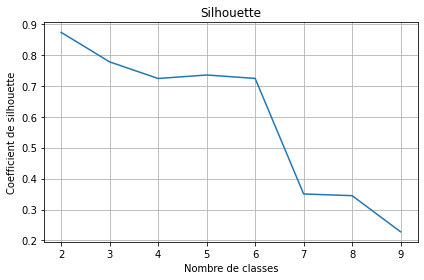

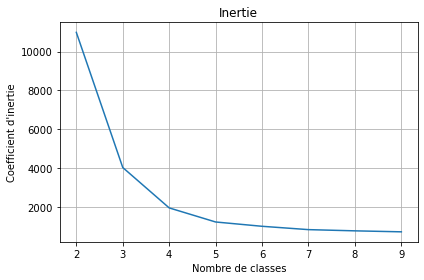

In [21]:
%matplotlib inline
plot_silhouette_inertie(df0_std, range(2,10,1))

- Pour le coefficient de silhoutte nombre de clusters K = 2-6
- Pour le coefficient d'inertie le K = 4 est optimale
- Donc on choisi K = 4

In [22]:
nbr_cluster = 3
km = KMeans(n_clusters = nbr_cluster, n_init=100 ) 
# on peut entrainer le modèle et obtenir les labels en meme temps avec fit_predict
prediction = km.fit_predict(df0_std)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0])

#### Coefficient de silhouette par cluster

In [23]:
for nbr in range(nbr_cluster):
    print("cluster", nbr)
    print("score silhouette:", metrics.silhouette_score(df0_std, prediction==nbr))
    print("")

cluster 0
score silhouette: 0.7973665297599456

cluster 1
score silhouette: 0.8937906056337493

cluster 2
score silhouette: 0.677209144184054



#### Score Davies_Bouldin

In [24]:
for label in np.unique(prediction):
    print("cluster:", label)
    print("nbr_element dans le cluster:", df0_std.groupby(prediction).size()[label])
    print("davies_bouldin_score:",metrics.davies_bouldin_score(df0_std, prediction == label).round(3))
    print("liste d'individus:\n")
    idk=np.argsort(prediction)
    dfname = pd.DataFrame(df0_std.index[idk], prediction[idk])
    dfname[dfname.index == label].apply(lambda x: print(x.values))
    print("="*50)

cluster: 0
nbr_element dans le cluster: 110
davies_bouldin_score: 0.66
liste d'individus:

[  0  92  91  90  88  86  85  84  83  82  79  78  77  76  75  74  73  71
  70  69  68 136  66  62  94  96  98  99 135 134 131 128 127 126 124 123
 122 119 118  61 114 111 110 109 108 107 106 105 104 103 102 101 112  60
  67  58  59  25  24  23  22  21  20  19  18  17  16  15  27  14  12  11
  10   9   8   7   6   5   4   3   2   1  13  28  26  30  57  55  53  52
  51  49  48  47  29  45  44  43  46  41  31  32  33  42  35  36  34  37
  38 137]
cluster: 1
nbr_element dans le cluster: 3
davies_bouldin_score: 0.157
liste d'individus:

[115 125 129]
cluster: 2
nbr_element dans le cluster: 10
davies_bouldin_score: 0.612
liste d'individus:

[ 72 116 113  87  80  65  63 133  97 117]


#### Caracterisation des clusters

In [25]:
# definir une fonction utile pour avoir les métriques
def get_metriques(df=df, prediction = prediction):
    # calcul de la moyenne par variable
    m = df.mean()

    #TSS = 1/N * variance de chaque variable
    TSS = df.shape[0]*df.var(ddof = 0)
    dfTSS = pd.DataFrame(TSS, columns = ["TSS"])

    # ecart entre moyenne du cluster et la moyenne pour tous les fromages
    #pour chaque groupe écart à la moyenne par variable
    ecart = (df.groupby(prediction).mean() - m)**2
    # pndérer l'écart
    ecartp = ecart.multiply(df.groupby(prediction).size(), axis = 0)
    # calcule de BSS
    BSS = np.sum(ecartp, axis = 0)
    dfBSS = pd.DataFrame(BSS, columns = ["BSS"])

    #carré du rapport de corrélation
    #variance expliquée par l'appartenance aux groupes
    #pour chaque variable
    R2 = BSS/TSS
    dfr2 = pd.DataFrame(R2, columns = ["R2"])
    return pd.concat([dfTSS,dfBSS,dfr2], axis = 1)

In [26]:
# index trié des labels(prediction)
idk=np.argsort(prediction)

* **Indications:**
    * Ligne Moyenne totale: est la Moyenne des variables initiales sur tous les fromages (tout le dataset)
    * Les autres valeurs sont la moyenne de la variables dans chaque cluster

In [27]:
# Afficher les deux moyennes
pd.concat([df0_std.groupby(prediction).mean(), pd.DataFrame(df0_std.mean(),columns = ["Moyenne_totale"]).T])

,AGE,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,Drug,['SCOREBINLDL16sem']_MAUVAIS,['SCOREBINTG16sem']_MAUVAIS,['sex']_M
0,-0.195611,0.047603,0.009524,0.030052,0.316630,0.128233,1.394730,0.199522,0.043975,0.500000,-0.481818,-0.300000,0.300000
1,0.160920,-0.351515,0.603175,-0.233446,-0.276423,1.281880,102.816425,1.347719,2.581395,0.666667,-0.666667,-0.333333,0.333333
2,-0.062069,0.170909,0.400000,0.366330,0.709756,0.576769,31.318841,0.703158,1.465116,0.400000,-0.400000,-0.300000,0.100000
Moyenne_totale,-0.176058,0.047894,0.055749,0.050965,0.334127,0.192837,6.301284,0.268472,0.221403,0.495935,-0.479675,-0.300813,0.284553


In [28]:
# Difference des deux moyennes
df_num.groupby(prediction).mean()-df_num.mean()

,AGE,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,Drug,['SCOREBINLDL16sem']_MAUVAIS,['SCOREBINTG16sem']_MAUVAIS,['sex']_M
0,-0.283518,-0.000798,-0.009707,-0.006211,-0.007174,-0.755868,-3.385523,-0.393020,-0.762942,0.004065,-0.002143,0.000813,0.015447
1,4.886179,-1.098374,0.114959,-0.084470,-0.250325,12.741805,66.595447,6.151707,10.147967,0.170732,-0.186992,-0.032520,0.048780
2,1.652846,0.338293,0.072293,0.093663,0.154008,4.492005,17.262114,2.477707,5.347967,-0.095935,0.079675,0.000813,-0.184553


In [29]:
# relation variance cluster / variable
get_metriques(df_num, prediction)

,TSS,BSS,R2
AGE,11400.406504,107.785292,0.009455
BMI,464.566341,4.763766,0.010254
HDLBL,3.054941,0.102275,0.033478
LDLBL,7.298673,0.113377,0.015534
TGBL,19.132787,0.430834,0.022518
ALATBL,15894.373675,751.688835,0.047293
GGT(microkat/L)BL,19074.143250,17545.460398,0.919856
ASATBL,4801.356133,191.911960,0.039970
BilirubineBL,2097.666992,658.980083,0.314149
Drug,30.747967,0.181301,0.005896


In [30]:
df_kmeans=df.copy()
df_kmeans['cluster']=prediction

In [31]:
df_kmeans

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem,cluster
0,43,Placebo,F,22.3,0.59,1.4082,0.57,6.000,0.25,13.800,6.5,MAUVAIS,BON,0
1,55,Drug,F,23.7,0.51,1.9100,0.65,6.600,0.18,11.400,7.9,BON,MAUVAIS,0
2,49,Placebo,F,21.7,0.65,2.0520,0.79,6.600,0.25,15.600,5.8,MAUVAIS,MAUVAIS,0
3,40,Placebo,F,23.8,0.43,1.8878,1.87,6.600,0.26,12.000,3.6,MAUVAIS,BON,0
4,44,Drug,F,22.1,0.57,1.2507,0.90,7.800,0.35,17.400,6.2,BON,BON,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,54,Drug,F,19.7,0.87,2.2220,0.39,42.084,32.00,28.056,15.0,BON,MAUVAIS,2
134,38,Placebo,M,24.2,0.41,1.6017,0.95,42.600,0.39,30.000,12.1,MAUVAIS,MAUVAIS,0
135,33,Placebo,M,27.7,0.37,1.6890,1.36,64.800,1.60,28.800,10.0,MAUVAIS,MAUVAIS,0
136,34,Drug,M,27.4,0.39,1.7691,1.86,67.800,1.44,34.800,10.6,MAUVAIS,BON,0


In [32]:
df_kmeans.groupby('cluster')['TRAITTEST'].value_counts()

cluster  TRAITTEST
0        Drug         55
         Placebo      55
1        Drug          2
         Placebo       1
2        Placebo       6
         Drug          4
Name: TRAITTEST, dtype: int64

In [33]:
df_kmeans.groupby('cluster')["SCOREBINLDL16sem"].value_counts()

cluster  SCOREBINLDL16sem
0        MAUVAIS             57
         BON                 53
1        BON                  2
         MAUVAIS              1
2        MAUVAIS              6
         BON                  4
Name: SCOREBINLDL16sem, dtype: int64

In [34]:
df_kmeans.groupby('cluster')["SCOREBINTG16sem"].value_counts()

cluster  SCOREBINTG16sem
0        MAUVAIS            77
         BON                33
1        MAUVAIS             2
         BON                 1
2        MAUVAIS             7
         BON                 3
Name: SCOREBINTG16sem, dtype: int64

In [35]:
df_kmeans.groupby('cluster')['TRAITTEST'].value_counts()

cluster  TRAITTEST
0        Drug         55
         Placebo      55
1        Drug          2
         Placebo       1
2        Placebo       6
         Drug          4
Name: TRAITTEST, dtype: int64

In [36]:
df_kmeans.groupby('cluster')["SEX"].value_counts()

cluster  SEX
0        F      77
         M      33
1        F       2
         M       1
2        F       9
         M       1
Name: SEX, dtype: int64

- Note: pas bon clustering

### 3.2. K-prototypes clustering avec les variables mixed

In [37]:
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [107]:
df.isnull().values.any().sum()

0

In [108]:
df

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
0,43,Placebo,F,22.3,0.59,1.4082,0.57,6.000,0.25,13.800,6.5,MAUVAIS,BON
1,55,Drug,F,23.7,0.51,1.9100,0.65,6.600,0.18,11.400,7.9,BON,MAUVAIS
2,49,Placebo,F,21.7,0.65,2.0520,0.79,6.600,0.25,15.600,5.8,MAUVAIS,MAUVAIS
3,40,Placebo,F,23.8,0.43,1.8878,1.87,6.600,0.26,12.000,3.6,MAUVAIS,BON
4,44,Drug,F,22.1,0.57,1.2507,0.90,7.800,0.35,17.400,6.2,BON,BON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,54,Drug,F,19.7,0.87,2.2220,0.39,42.084,32.00,28.056,15.0,BON,MAUVAIS
134,38,Placebo,M,24.2,0.41,1.6017,0.95,42.600,0.39,30.000,12.1,MAUVAIS,MAUVAIS
135,33,Placebo,M,27.7,0.37,1.6890,1.36,64.800,1.60,28.800,10.0,MAUVAIS,MAUVAIS
136,34,Drug,M,27.4,0.39,1.7691,1.86,67.800,1.44,34.800,10.6,MAUVAIS,BON


#### Le plot de coude

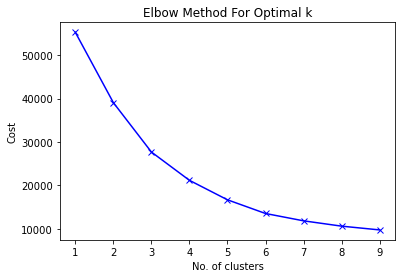

In [40]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kprot = KPrototypes(n_clusters=num_clusters,n_init = 30)
    kprot.fit_predict(df, categorical=[1, 2,11,12])
    cost.append(kprot.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

- Valueur optimale de K est 4.

In [41]:
kp = KPrototypes(n_clusters=4,n_init = 20)
kp.fit_predict(df, categorical=[1, 2,11,12])# On doit specifier explicitement les variables categoriels
clusters = kp.fit_predict(df, categorical=[1, 2,11,12])
df_prot=df.copy()
df_prot['cluster']=clusters

In [42]:
df_prot

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem,cluster
0,43,Placebo,F,22.3,0.59,1.4082,0.57,6.000,0.25,13.800,6.5,MAUVAIS,BON,2
1,55,Drug,F,23.7,0.51,1.9100,0.65,6.600,0.18,11.400,7.9,BON,MAUVAIS,2
2,49,Placebo,F,21.7,0.65,2.0520,0.79,6.600,0.25,15.600,5.8,MAUVAIS,MAUVAIS,2
3,40,Placebo,F,23.8,0.43,1.8878,1.87,6.600,0.26,12.000,3.6,MAUVAIS,BON,2
4,44,Drug,F,22.1,0.57,1.2507,0.90,7.800,0.35,17.400,6.2,BON,BON,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,54,Drug,F,19.7,0.87,2.2220,0.39,42.084,32.00,28.056,15.0,BON,MAUVAIS,1
134,38,Placebo,M,24.2,0.41,1.6017,0.95,42.600,0.39,30.000,12.1,MAUVAIS,MAUVAIS,0
135,33,Placebo,M,27.7,0.37,1.6890,1.36,64.800,1.60,28.800,10.0,MAUVAIS,MAUVAIS,3
136,34,Drug,M,27.4,0.39,1.7691,1.86,67.800,1.44,34.800,10.6,MAUVAIS,BON,3


In [43]:
df_prot.groupby('cluster')['SCOREBINLDL16sem'].value_counts()

cluster  SCOREBINLDL16sem
0        MAUVAIS             20
         BON                 15
1        BON                  3
         MAUVAIS              2
2        BON                 40
         MAUVAIS             40
3        MAUVAIS              2
         BON                  1
Name: SCOREBINLDL16sem, dtype: int64

In [44]:
df_prot.groupby('cluster')['SCOREBINTG16sem'].value_counts()

cluster  SCOREBINTG16sem
0        MAUVAIS            27
         BON                 8
1        MAUVAIS             4
         BON                 1
2        MAUVAIS            53
         BON                27
3        MAUVAIS             2
         BON                 1
Name: SCOREBINTG16sem, dtype: int64

In [45]:
df_prot.groupby('cluster')['TRAITTEST'].value_counts()

cluster  TRAITTEST
0        Placebo      18
         Drug         17
1        Drug          3
         Placebo       2
2        Placebo      41
         Drug         39
3        Drug          2
         Placebo       1
Name: TRAITTEST, dtype: int64

### 3.3. KModes clustering avec les variables numeriques transformees en categoriels

In [46]:
from kmodes.kmodes import KModes


df

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
0,43,Placebo,F,22.3,0.59,1.4082,0.57,6.000,0.25,13.800,6.5,MAUVAIS,BON
1,55,Drug,F,23.7,0.51,1.9100,0.65,6.600,0.18,11.400,7.9,BON,MAUVAIS
2,49,Placebo,F,21.7,0.65,2.0520,0.79,6.600,0.25,15.600,5.8,MAUVAIS,MAUVAIS
3,40,Placebo,F,23.8,0.43,1.8878,1.87,6.600,0.26,12.000,3.6,MAUVAIS,BON
4,44,Drug,F,22.1,0.57,1.2507,0.90,7.800,0.35,17.400,6.2,BON,BON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,54,Drug,F,19.7,0.87,2.2220,0.39,42.084,32.00,28.056,15.0,BON,MAUVAIS
134,38,Placebo,M,24.2,0.41,1.6017,0.95,42.600,0.39,30.000,12.1,MAUVAIS,MAUVAIS
135,33,Placebo,M,27.7,0.37,1.6890,1.36,64.800,1.60,28.800,10.0,MAUVAIS,MAUVAIS
136,34,Drug,M,27.4,0.39,1.7691,1.86,67.800,1.44,34.800,10.6,MAUVAIS,BON


In [47]:
df_categ=df.copy()

In [48]:
df_categ.median()

AGE                  50.000
BMI                  23.300
HDLBL                 0.580
LDLBL                 1.626
TGBL                  0.730
ALATBL               17.400
GGT(microkat/L)BL     0.390
ASATBL               18.036
BilirubineBL          8.900
dtype: float64

In [49]:
columns=df_categ.columns
columns

Index(['AGE', 'TRAITTEST', 'SEX', 'BMI', 'HDLBL', 'LDLBL', 'TGBL', 'ALATBL',
       'GGT(microkat/L)BL', 'ASATBL', 'BilirubineBL', 'SCOREBINLDL16sem',
       'SCOREBINTG16sem'],
      dtype='object')

In [50]:
cut_labels_2 = ['low', 'high']
columns=['AGE','BMI', 'HDLBL', 'LDLBL', 'TGBL', 'ALATBL',
       'GGT(microkat/L)BL', 'ASATBL', 'BilirubineBL',]
for cols in columns:
 cut_bins = [0, df_categ[cols].median(),df_categ[cols].max()]
 df_categ[cols] = pd.cut(df_categ[cols], bins=cut_bins, labels=cut_labels_2)

In [51]:
df_kmodes=df_categ.copy()
df_kmodes

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
0,low,Placebo,F,low,high,low,low,low,low,low,low,MAUVAIS,BON
1,high,Drug,F,high,low,high,low,low,low,low,low,BON,MAUVAIS
2,low,Placebo,F,low,high,high,high,low,low,low,low,MAUVAIS,MAUVAIS
3,low,Placebo,F,high,low,high,high,low,low,low,low,MAUVAIS,BON
4,low,Drug,F,low,low,low,high,low,low,low,low,BON,BON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,high,Drug,F,low,high,high,low,high,high,high,high,BON,MAUVAIS
134,low,Placebo,M,high,low,low,high,high,low,high,high,MAUVAIS,MAUVAIS
135,low,Placebo,M,high,low,high,high,high,high,high,high,MAUVAIS,MAUVAIS
136,low,Drug,M,high,low,high,high,high,high,high,high,MAUVAIS,BON


In [52]:
colonnes=df_kmodes.columns
for cols in colonnes:
    print(cols,'\n',df_kmodes[cols].value_counts(),'\n---\n')

AGE 
 low     65
high    58
Name: AGE, dtype: int64 
---

TRAITTEST 
 Placebo    62
Drug       61
Name: TRAITTEST, dtype: int64 
---

SEX 
 F    88
M    35
Name: SEX, dtype: int64 
---

BMI 
 low     64
high    59
Name: BMI, dtype: int64 
---

HDLBL 
 low     63
high    60
Name: HDLBL, dtype: int64 
---

LDLBL 
 low     62
high    61
Name: LDLBL, dtype: int64 
---

TGBL 
 low     64
high    59
Name: TGBL, dtype: int64 
---

ALATBL 
 low     63
high    60
Name: ALATBL, dtype: int64 
---

GGT(microkat/L)BL 
 low     64
high    59
Name: GGT(microkat/L)BL, dtype: int64 
---

ASATBL 
 low     62
high    61
Name: ASATBL, dtype: int64 
---

BilirubineBL 
 low     64
high    59
Name: BilirubineBL, dtype: int64 
---

SCOREBINLDL16sem 
 MAUVAIS    64
BON        59
Name: SCOREBINLDL16sem, dtype: int64 
---

SCOREBINTG16sem 
 MAUVAIS    86
BON        37
Name: SCOREBINTG16sem, dtype: int64 
---



In [53]:
df_kmodes.groupby('SEX')['SCOREBINTG16sem'].value_counts()

SEX  SCOREBINTG16sem
F    MAUVAIS            63
     BON                25
M    MAUVAIS            23
     BON                12
Name: SCOREBINTG16sem, dtype: int64

* NOTE:
    * C'est visible que les donnees sont bien equilibrees (a peut pres la meme quantite de valeurs binaires 'low'-'high','mauvais'-'bon'), seuf 'SEX' et 'SCOREBINTG16sem'

#### Le plot de coude

In [54]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 100, verbose=1)
    kmode.fit_predict(df_kmodes)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves:

Run 65, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 66, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 67, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 68, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 69, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 70, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 71, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 72, iteration: 1/100, moves: 0, cost: 728.0
Init: initializing centroids
Init: initializing clusters

Run 23, iteration: 1/100, moves: 19, cost: 497.0
Run 23, iteration: 2/100, moves: 0, cost: 497.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 24, iteration: 1/100, moves: 27, cost: 505.0
Run 24, iteration: 2/100, moves: 3, cost: 505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 25, iteration: 1/100, moves: 17, cost: 497.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 26, iteration: 1/100, moves: 15, cost: 505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 27, iteration: 1/100, moves: 32, cost: 505.0
Run 27, iteration: 2/100, moves: 11, cost: 505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 28, iteration: 1/100, moves: 10, cost: 530.0
Run 28, iteration: 2/100, moves: 17, cost: 527.0
Run 28, iteration: 3/100, moves: 10, cost: 517.0
Run 28, iteration: 4/100, moves: 0, cost: 517.0
Init: initializ

Run 72, iteration: 1/100, moves: 22, cost: 541.0
Run 72, iteration: 2/100, moves: 3, cost: 541.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 73, iteration: 1/100, moves: 15, cost: 519.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 74, iteration: 1/100, moves: 18, cost: 505.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 75, iteration: 1/100, moves: 18, cost: 519.0
Run 75, iteration: 2/100, moves: 2, cost: 519.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 76, iteration: 1/100, moves: 20, cost: 533.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 77, iteration: 1/100, moves: 34, cost: 535.0
Run 77, iteration: 2/100, moves: 2, cost: 535.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 78, iteration: 1/100, moves: 25, cost: 517.0
Run 78, iteration: 2/100, moves: 

Run 19, iteration: 1/100, moves: 29, cost: 446.0
Run 19, iteration: 2/100, moves: 1, cost: 446.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 20, iteration: 1/100, moves: 30, cost: 457.0
Run 20, iteration: 2/100, moves: 16, cost: 450.0
Run 20, iteration: 3/100, moves: 0, cost: 450.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 21, iteration: 1/100, moves: 29, cost: 464.0
Run 21, iteration: 2/100, moves: 0, cost: 464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 22, iteration: 1/100, moves: 23, cost: 522.0
Run 22, iteration: 2/100, moves: 15, cost: 508.0
Run 22, iteration: 3/100, moves: 11, cost: 506.0
Run 22, iteration: 4/100, moves: 0, cost: 506.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 23, iteration: 1/100, moves: 27, cost: 450.0
Run 23, iteration: 2/100, moves: 9, cost: 450.0
Init: initializing centroids
Init: initializing 

Run 60, iteration: 2/100, moves: 6, cost: 471.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 61, iteration: 1/100, moves: 28, cost: 474.0
Run 61, iteration: 2/100, moves: 4, cost: 474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 62, iteration: 1/100, moves: 32, cost: 476.0
Run 62, iteration: 2/100, moves: 19, cost: 468.0
Run 62, iteration: 3/100, moves: 1, cost: 468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 63, iteration: 1/100, moves: 21, cost: 469.0
Run 63, iteration: 2/100, moves: 10, cost: 469.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 64, iteration: 1/100, moves: 30, cost: 486.0
Run 64, iteration: 2/100, moves: 1, cost: 486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 65, iteration: 1/100, moves: 36, cost: 475.0
Run 65, iteration: 2/100, moves: 3, cost: 475.0
Init: initializin

Run 3, iteration: 1/100, moves: 33, cost: 431.0
Run 3, iteration: 2/100, moves: 17, cost: 410.0
Run 3, iteration: 3/100, moves: 14, cost: 399.0
Run 3, iteration: 4/100, moves: 0, cost: 399.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 38, cost: 406.0
Run 4, iteration: 2/100, moves: 8, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 37, cost: 401.0
Run 5, iteration: 2/100, moves: 5, cost: 401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 15, cost: 461.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 39, cost: 395.0
Run 7, iteration: 2/100, moves: 2, cost: 395.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: 18, cost: 442.0
Run 8, iteration: 2/100, mov

Run 41, iteration: 3/100, moves: 0, cost: 419.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 42, iteration: 1/100, moves: 23, cost: 440.0
Run 42, iteration: 2/100, moves: 16, cost: 437.0
Run 42, iteration: 3/100, moves: 3, cost: 437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 43, iteration: 1/100, moves: 14, cost: 481.0
Run 43, iteration: 2/100, moves: 6, cost: 481.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 44, iteration: 1/100, moves: 23, cost: 442.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 45, iteration: 1/100, moves: 29, cost: 431.0
Run 45, iteration: 2/100, moves: 20, cost: 417.0
Run 45, iteration: 3/100, moves: 0, cost: 417.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 46, iteration: 1/100, moves: 25, cost: 424.0
Run 46, iteration: 2/100, moves: 15, cost: 410.0
Run 46, iteratio

Run 81, iteration: 2/100, moves: 11, cost: 391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 82, iteration: 1/100, moves: 32, cost: 455.0
Run 82, iteration: 2/100, moves: 3, cost: 455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 83, iteration: 1/100, moves: 37, cost: 422.0
Run 83, iteration: 2/100, moves: 16, cost: 422.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 84, iteration: 1/100, moves: 31, cost: 393.0
Run 84, iteration: 2/100, moves: 13, cost: 393.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 85, iteration: 1/100, moves: 34, cost: 388.0
Run 85, iteration: 2/100, moves: 21, cost: 376.0
Run 85, iteration: 3/100, moves: 4, cost: 376.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 86, iteration: 1/100, moves: 29, cost: 379.0
Run 86, iteration: 2/100, moves: 7, cost: 379.0
Init: initializ

Init: initializing clusters
Starting iterations...
Run 20, iteration: 1/100, moves: 25, cost: 382.0
Run 20, iteration: 2/100, moves: 9, cost: 382.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 21, iteration: 1/100, moves: 26, cost: 380.0
Run 21, iteration: 2/100, moves: 15, cost: 374.0
Run 21, iteration: 3/100, moves: 5, cost: 374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 22, iteration: 1/100, moves: 27, cost: 364.0
Run 22, iteration: 2/100, moves: 25, cost: 361.0
Run 22, iteration: 3/100, moves: 1, cost: 361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 23, iteration: 1/100, moves: 33, cost: 393.0
Run 23, iteration: 2/100, moves: 10, cost: 389.0
Run 23, iteration: 3/100, moves: 2, cost: 389.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 24, iteration: 1/100, moves: 41, cost: 399.0
Run 24, iteration: 2/100, moves: 25, cost: 38

Run 59, iteration: 1/100, moves: 38, cost: 375.0
Run 59, iteration: 2/100, moves: 10, cost: 365.0
Run 59, iteration: 3/100, moves: 6, cost: 365.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 60, iteration: 1/100, moves: 40, cost: 396.0
Run 60, iteration: 2/100, moves: 13, cost: 396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 61, iteration: 1/100, moves: 34, cost: 369.0
Run 61, iteration: 2/100, moves: 1, cost: 369.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 62, iteration: 1/100, moves: 36, cost: 385.0
Run 62, iteration: 2/100, moves: 15, cost: 378.0
Run 62, iteration: 3/100, moves: 3, cost: 378.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 63, iteration: 1/100, moves: 40, cost: 441.0
Run 63, iteration: 2/100, moves: 17, cost: 410.0
Run 63, iteration: 3/100, moves: 10, cost: 410.0
Init: initializing centroids
Init: initializin

Run 96, iteration: 1/100, moves: 35, cost: 364.0
Run 96, iteration: 2/100, moves: 12, cost: 364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 97, iteration: 1/100, moves: 29, cost: 421.0
Run 97, iteration: 2/100, moves: 4, cost: 421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 98, iteration: 1/100, moves: 40, cost: 378.0
Run 98, iteration: 2/100, moves: 15, cost: 378.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 99, iteration: 1/100, moves: 47, cost: 404.0
Run 99, iteration: 2/100, moves: 25, cost: 380.0
Run 99, iteration: 3/100, moves: 8, cost: 380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 100, iteration: 1/100, moves: 28, cost: 385.0
Run 100, iteration: 2/100, moves: 20, cost: 371.0
Run 100, iteration: 3/100, moves: 16, cost: 363.0
Run 100, iteration: 4/100, moves: 9, cost: 357.0
Run 100, iteration: 5/100, moves: 0, cost:

Run 33, iteration: 2/100, moves: 18, cost: 357.0
Run 33, iteration: 3/100, moves: 20, cost: 352.0
Run 33, iteration: 4/100, moves: 0, cost: 352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 34, iteration: 1/100, moves: 24, cost: 386.0
Run 34, iteration: 2/100, moves: 15, cost: 365.0
Run 34, iteration: 3/100, moves: 21, cost: 358.0
Run 34, iteration: 4/100, moves: 6, cost: 355.0
Run 34, iteration: 5/100, moves: 0, cost: 355.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 35, iteration: 1/100, moves: 30, cost: 368.0
Run 35, iteration: 2/100, moves: 7, cost: 367.0
Run 35, iteration: 3/100, moves: 2, cost: 367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 36, iteration: 1/100, moves: 30, cost: 343.0
Run 36, iteration: 2/100, moves: 6, cost: 343.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 37, iteration: 1/100, moves: 19, cost: 352.0


Run 70, iteration: 3/100, moves: 1, cost: 366.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 71, iteration: 1/100, moves: 41, cost: 370.0
Run 71, iteration: 2/100, moves: 10, cost: 370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 72, iteration: 1/100, moves: 32, cost: 352.0
Run 72, iteration: 2/100, moves: 2, cost: 352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 73, iteration: 1/100, moves: 38, cost: 378.0
Run 73, iteration: 2/100, moves: 26, cost: 356.0
Run 73, iteration: 3/100, moves: 25, cost: 349.0
Run 73, iteration: 4/100, moves: 9, cost: 347.0
Run 73, iteration: 5/100, moves: 5, cost: 347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 74, iteration: 1/100, moves: 29, cost: 353.0
Run 74, iteration: 2/100, moves: 17, cost: 345.0
Run 74, iteration: 3/100, moves: 4, cost: 345.0
Init: initializing centroids
Init: initializing 

Run 6, iteration: 3/100, moves: 1, cost: 337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 44, cost: 371.0
Run 7, iteration: 2/100, moves: 28, cost: 353.0
Run 7, iteration: 3/100, moves: 3, cost: 353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: 42, cost: 348.0
Run 8, iteration: 2/100, moves: 18, cost: 324.0
Run 8, iteration: 3/100, moves: 17, cost: 317.0
Run 8, iteration: 4/100, moves: 6, cost: 316.0
Run 8, iteration: 5/100, moves: 1, cost: 316.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 9, iteration: 1/100, moves: 34, cost: 342.0
Run 9, iteration: 2/100, moves: 23, cost: 332.0
Run 9, iteration: 3/100, moves: 2, cost: 332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 10, iteration: 1/100, moves: 30, cost: 360.0
Run 10, iteration: 2/100, moves: 25, cost: 348.0
Run 10, ite

Run 40, iteration: 3/100, moves: 4, cost: 332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 41, iteration: 1/100, moves: 32, cost: 350.0
Run 41, iteration: 2/100, moves: 14, cost: 350.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 42, iteration: 1/100, moves: 38, cost: 350.0
Run 42, iteration: 2/100, moves: 15, cost: 342.0
Run 42, iteration: 3/100, moves: 3, cost: 342.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 43, iteration: 1/100, moves: 35, cost: 346.0
Run 43, iteration: 2/100, moves: 17, cost: 335.0
Run 43, iteration: 3/100, moves: 6, cost: 333.0
Run 43, iteration: 4/100, moves: 1, cost: 333.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 44, iteration: 1/100, moves: 32, cost: 366.0
Run 44, iteration: 2/100, moves: 22, cost: 351.0
Run 44, iteration: 3/100, moves: 11, cost: 339.0
Run 44, iteration: 4/100, moves: 10, cost: 333.

Run 78, iteration: 1/100, moves: 38, cost: 353.0
Run 78, iteration: 2/100, moves: 10, cost: 343.0
Run 78, iteration: 3/100, moves: 11, cost: 341.0
Run 78, iteration: 4/100, moves: 0, cost: 341.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 79, iteration: 1/100, moves: 28, cost: 339.0
Run 79, iteration: 2/100, moves: 12, cost: 329.0
Run 79, iteration: 3/100, moves: 5, cost: 329.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 80, iteration: 1/100, moves: 33, cost: 335.0
Run 80, iteration: 2/100, moves: 9, cost: 329.0
Run 80, iteration: 3/100, moves: 12, cost: 329.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 81, iteration: 1/100, moves: 29, cost: 363.0
Run 81, iteration: 2/100, moves: 1, cost: 363.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 82, iteration: 1/100, moves: 25, cost: 346.0
Run 82, iteration: 2/100, moves: 12, cost: 346.

Init: initializing clusters
Starting iterations...
Run 15, iteration: 1/100, moves: 29, cost: 317.0
Run 15, iteration: 2/100, moves: 9, cost: 315.0
Run 15, iteration: 3/100, moves: 5, cost: 310.0
Run 15, iteration: 4/100, moves: 3, cost: 307.0
Run 15, iteration: 5/100, moves: 1, cost: 307.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 16, iteration: 1/100, moves: 34, cost: 317.0
Run 16, iteration: 2/100, moves: 20, cost: 304.0
Run 16, iteration: 3/100, moves: 5, cost: 304.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 17, iteration: 1/100, moves: 30, cost: 326.0
Run 17, iteration: 2/100, moves: 10, cost: 326.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 18, iteration: 1/100, moves: 27, cost: 320.0
Run 18, iteration: 2/100, moves: 6, cost: 315.0
Run 18, iteration: 3/100, moves: 4, cost: 315.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

Run 52, iteration: 2/100, moves: 9, cost: 331.0
Run 52, iteration: 3/100, moves: 12, cost: 326.0
Run 52, iteration: 4/100, moves: 1, cost: 326.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 53, iteration: 1/100, moves: 32, cost: 335.0
Run 53, iteration: 2/100, moves: 10, cost: 330.0
Run 53, iteration: 3/100, moves: 0, cost: 330.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 54, iteration: 1/100, moves: 38, cost: 331.0
Run 54, iteration: 2/100, moves: 16, cost: 318.0
Run 54, iteration: 3/100, moves: 6, cost: 318.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 55, iteration: 1/100, moves: 20, cost: 341.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 56, iteration: 1/100, moves: 29, cost: 335.0
Run 56, iteration: 2/100, moves: 10, cost: 330.0
Run 56, iteration: 3/100, moves: 2, cost: 330.0
Init: initializing centroids
Init: initializing 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 89, iteration: 1/100, moves: 34, cost: 334.0
Run 89, iteration: 2/100, moves: 6, cost: 334.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 90, iteration: 1/100, moves: 26, cost: 344.0
Run 90, iteration: 2/100, moves: 5, cost: 341.0
Run 90, iteration: 3/100, moves: 3, cost: 341.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 91, iteration: 1/100, moves: 32, cost: 358.0
Run 91, iteration: 2/100, moves: 1, cost: 358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 92, iteration: 1/100, moves: 35, cost: 336.0
Run 92, iteration: 2/100, moves: 27, cost: 322.0
Run 92, iteration: 3/100, moves: 2, cost: 322.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 93, iteration: 1/100, moves: 37, cost: 322.0
Run 93, iteration: 2/100, moves: 22, cost: 316.0
Run 93, iteration

Run 25, iteration: 1/100, moves: 27, cost: 337.0
Run 25, iteration: 2/100, moves: 1, cost: 337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 26, iteration: 1/100, moves: 16, cost: 331.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 27, iteration: 1/100, moves: 33, cost: 313.0
Run 27, iteration: 2/100, moves: 5, cost: 310.0
Run 27, iteration: 3/100, moves: 2, cost: 310.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 28, iteration: 1/100, moves: 33, cost: 303.0
Run 28, iteration: 2/100, moves: 13, cost: 303.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 29, iteration: 1/100, moves: 33, cost: 325.0
Run 29, iteration: 2/100, moves: 1, cost: 325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 30, iteration: 1/100, moves: 35, cost: 321.0
Run 30, iteration: 2/100, moves: 21, cost: 302.0
Run 30, iteratio

Run 63, iteration: 1/100, moves: 19, cost: 332.0
Run 63, iteration: 2/100, moves: 9, cost: 325.0
Run 63, iteration: 3/100, moves: 13, cost: 324.0
Run 63, iteration: 4/100, moves: 2, cost: 324.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 64, iteration: 1/100, moves: 27, cost: 315.0
Run 64, iteration: 2/100, moves: 14, cost: 308.0
Run 64, iteration: 3/100, moves: 0, cost: 308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 65, iteration: 1/100, moves: 25, cost: 313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 66, iteration: 1/100, moves: 37, cost: 335.0
Run 66, iteration: 2/100, moves: 24, cost: 316.0
Run 66, iteration: 3/100, moves: 6, cost: 316.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 67, iteration: 1/100, moves: 25, cost: 329.0
Run 67, iteration: 2/100, moves: 1, cost: 329.0
Init: initializing centroids
Init: initializing 

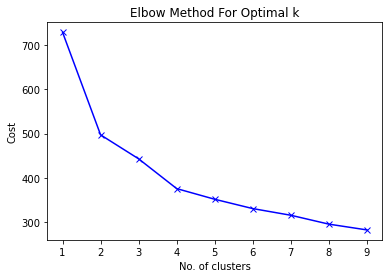

In [55]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

- On choisi K = 4

In [56]:
km = KModes(n_clusters=4, init='Huang', n_init=100, verbose=1)
clusters = km.fit_predict(df_kmodes)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 36, cost: 415.0
Run 1, iteration: 2/100, moves: 23, cost: 384.0
Run 1, iteration: 3/100, moves: 13, cost: 384.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 31, cost: 397.0
Run 2, iteration: 2/100, moves: 20, cost: 377.0
Run 2, iteration: 3/100, moves: 6, cost: 377.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 30, cost: 386.0
Run 3, iteration: 2/100, moves: 18, cost: 386.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 34, cost: 419.0
Run 4, iteration: 2/100, moves: 24, cost: 380.0
Run 4, iteration: 3/100, moves: 9, cost: 380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 46, cost: 411.0
Run 5, iteration: 2/100, m

Run 37, iteration: 1/100, moves: 22, cost: 446.0
Run 37, iteration: 2/100, moves: 10, cost: 442.0
Run 37, iteration: 3/100, moves: 5, cost: 442.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 38, iteration: 1/100, moves: 30, cost: 411.0
Run 38, iteration: 2/100, moves: 17, cost: 407.0
Run 38, iteration: 3/100, moves: 0, cost: 407.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 39, iteration: 1/100, moves: 40, cost: 413.0
Run 39, iteration: 2/100, moves: 27, cost: 400.0
Run 39, iteration: 3/100, moves: 15, cost: 400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 40, iteration: 1/100, moves: 48, cost: 407.0
Run 40, iteration: 2/100, moves: 24, cost: 386.0
Run 40, iteration: 3/100, moves: 4, cost: 386.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 41, iteration: 1/100, moves: 32, cost: 421.0
Run 41, iteration: 2/100, moves: 18, cost: 419

Run 76, iteration: 1/100, moves: 39, cost: 416.0
Run 76, iteration: 2/100, moves: 11, cost: 416.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 77, iteration: 1/100, moves: 31, cost: 417.0
Run 77, iteration: 2/100, moves: 23, cost: 384.0
Run 77, iteration: 3/100, moves: 11, cost: 380.0
Run 77, iteration: 4/100, moves: 1, cost: 380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 78, iteration: 1/100, moves: 43, cost: 419.0
Run 78, iteration: 2/100, moves: 30, cost: 380.0
Run 78, iteration: 3/100, moves: 15, cost: 380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 79, iteration: 1/100, moves: 17, cost: 430.0
Run 79, iteration: 2/100, moves: 24, cost: 409.0
Run 79, iteration: 3/100, moves: 15, cost: 384.0
Run 79, iteration: 4/100, moves: 15, cost: 379.0
Run 79, iteration: 5/100, moves: 4, cost: 379.0
Init: initializing centroids
Init: initializing clusters
Starting iterations

In [57]:
print(km.cluster_centroids_)

[['high' 'Drug' 'F' 'high' 'low' 'high' 'high' 'low' 'low' 'low' 'low'
  'BON' 'MAUVAIS']
 ['low' 'Placebo' 'M' 'high' 'low' 'low' 'high' 'high' 'high' 'high'
  'high' 'MAUVAIS' 'MAUVAIS']
 ['high' 'Placebo' 'F' 'low' 'high' 'low' 'low' 'low' 'low' 'low' 'low'
  'MAUVAIS' 'MAUVAIS']
 ['low' 'Drug' 'F' 'low' 'high' 'high' 'low' 'high' 'high' 'high' 'high'
  'BON' 'MAUVAIS']]


In [58]:
df_kmodes['cluster']=clusters
df_kmodes.groupby('cluster').count()

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
cluster,,,,,,,,,,,,,
0,36,36,36,36,36,36,36,36,36,36,36,36,36
1,32,32,32,32,32,32,32,32,32,32,32,32,32
2,30,30,30,30,30,30,30,30,30,30,30,30,30
3,25,25,25,25,25,25,25,25,25,25,25,25,25


In [59]:
df_kmodes.groupby('cluster')['TRAITTEST'].value_counts()

cluster  TRAITTEST
0        Drug         26
         Placebo      10
1        Placebo      26
         Drug          6
2        Placebo      21
         Drug          9
3        Drug         20
         Placebo       5
Name: TRAITTEST, dtype: int64

In [60]:
df_kmodes.groupby('cluster')['SCOREBINLDL16sem'].value_counts()

cluster  SCOREBINLDL16sem
0        BON                 27
         MAUVAIS              9
1        MAUVAIS             25
         BON                  7
2        MAUVAIS             25
         BON                  5
3        BON                 20
         MAUVAIS              5
Name: SCOREBINLDL16sem, dtype: int64

In [61]:
cl0=df_kmodes[df_kmodes['cluster']==0]
cl0.groupby('TRAITTEST')['SCOREBINLDL16sem'].value_counts()

TRAITTEST  SCOREBINLDL16sem
Drug       BON                 21
           MAUVAIS              5
Placebo    BON                  6
           MAUVAIS              4
Name: SCOREBINLDL16sem, dtype: int64

In [62]:
cl0.groupby('AGE')['SCOREBINLDL16sem'].value_counts()

AGE   SCOREBINLDL16sem
low   BON                  9
      MAUVAIS              4
high  BON                 18
      MAUVAIS              5
Name: SCOREBINLDL16sem, dtype: int64

In [63]:
cl1=df_kmodes[df_kmodes['cluster']==1]
cl1.groupby('TRAITTEST')['SCOREBINLDL16sem'].value_counts()

TRAITTEST  SCOREBINLDL16sem
Drug       MAUVAIS              4
           BON                  2
Placebo    MAUVAIS             21
           BON                  5
Name: SCOREBINLDL16sem, dtype: int64

In [64]:
cl1.groupby('AGE')['SCOREBINLDL16sem'].value_counts()

AGE   SCOREBINLDL16sem
low   MAUVAIS             19
      BON                  5
high  MAUVAIS              6
      BON                  2
Name: SCOREBINLDL16sem, dtype: int64

In [65]:
cl2=df_kmodes[df_kmodes['cluster']==2]
cl2.groupby('TRAITTEST')['SCOREBINLDL16sem'].value_counts()

TRAITTEST  SCOREBINLDL16sem
Drug       MAUVAIS              6
           BON                  3
Placebo    MAUVAIS             19
           BON                  2
Name: SCOREBINLDL16sem, dtype: int64

In [66]:
cl2.groupby('AGE')['SCOREBINLDL16sem'].value_counts()

AGE   SCOREBINLDL16sem
low   MAUVAIS             12
      BON                  1
high  MAUVAIS             13
      BON                  4
Name: SCOREBINLDL16sem, dtype: int64

In [67]:
cl3=df_kmodes[df_kmodes['cluster']==3]
print(cl3.groupby('TRAITTEST')['SCOREBINLDL16sem'].value_counts())
print(cl3.groupby('TRAITTEST')['SCOREBINTG16sem'].value_counts())
print(cl3.groupby('TRAITTEST')['GGT(microkat/L)BL'].value_counts())
print(cl3.groupby('AGE')['SCOREBINLDL16sem'].value_counts())

TRAITTEST  SCOREBINLDL16sem
Drug       BON                 19
           MAUVAIS              1
Placebo    MAUVAIS              4
           BON                  1
Name: SCOREBINLDL16sem, dtype: int64
TRAITTEST  SCOREBINTG16sem
Drug       MAUVAIS            12
           BON                 8
Placebo    MAUVAIS             5
Name: SCOREBINTG16sem, dtype: int64
TRAITTEST  GGT(microkat/L)BL
Drug       high                 14
           low                   6
Placebo    high                  5
Name: GGT(microkat/L)BL, dtype: int64
AGE   SCOREBINLDL16sem
low   BON                 11
      MAUVAIS              4
high  BON                  9
      MAUVAIS              1
Name: SCOREBINLDL16sem, dtype: int64


In [68]:
df_kmodes.groupby('cluster')['TRAITTEST'].value_counts()

cluster  TRAITTEST
0        Drug         26
         Placebo      10
1        Placebo      26
         Drug          6
2        Placebo      21
         Drug          9
3        Drug         20
         Placebo       5
Name: TRAITTEST, dtype: int64

In [69]:
df_kmodes.groupby('cluster')['GGT(microkat/L)BL'].value_counts()

cluster  GGT(microkat/L)BL
0        low                  26
         high                 10
1        high                 26
         low                   6
2        low                  26
         high                  4
3        high                 19
         low                   6
Name: GGT(microkat/L)BL, dtype: int64

In [70]:
df_kmodes.groupby('cluster')['SCOREBINLDL16sem'].value_counts()

cluster  SCOREBINLDL16sem
0        BON                 27
         MAUVAIS              9
1        MAUVAIS             25
         BON                  7
2        MAUVAIS             25
         BON                  5
3        BON                 20
         MAUVAIS              5
Name: SCOREBINLDL16sem, dtype: int64

In [71]:
df_kmodes.groupby('cluster')['SCOREBINTG16sem'].value_counts()

cluster  SCOREBINTG16sem
0        MAUVAIS            27
         BON                 9
1        MAUVAIS            23
         BON                 9
2        MAUVAIS            19
         BON                11
3        MAUVAIS            17
         BON                 8
Name: SCOREBINTG16sem, dtype: int64

In [72]:
df_kmodes.groupby('cluster')['AGE'].value_counts()

cluster  AGE 
0        high    23
         low     13
1        low     24
         high     8
2        high    17
         low     13
3        low     15
         high    10
Name: AGE, dtype: int64

In [73]:
df_kmodes.groupby('cluster')['SEX'].value_counts()

cluster  SEX
0        F      31
         M       5
1        M      24
         F       8
2        F      28
         M       2
3        F      21
         M       4
Name: SEX, dtype: int64

### Association rules for each cluster (regles a 100%)

In [74]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [75]:
cluster1=df_kmodes[df_kmodes['cluster']==0].drop(columns = ['cluster'])
cluster2=df_kmodes[df_kmodes['cluster']==1].drop(columns = ['cluster'])
cluster3=df_kmodes[df_kmodes['cluster']==2].drop(columns = ['cluster'])
cluster4=df_kmodes[df_kmodes['cluster']==3].drop(columns = ['cluster'])

In [76]:
TC1=pd.get_dummies(cluster1)
TC2=pd.get_dummies(cluster2)
TC3=pd.get_dummies(cluster3)
TC4=pd.get_dummies(cluster4)

In [77]:
freq_itemsets1 = apriori(TC1,min_support=0.01,max_len=3,use_colnames=True)
freq_itemsets2 = apriori(TC2,min_support=0.01,max_len=3,use_colnames=True)
freq_itemsets3 = apriori(TC3,min_support=0.01,max_len=3,use_colnames=True)
freq_itemsets4 = apriori(TC4,min_support=0.01,max_len=3,use_colnames=True)

In [78]:
regles1 = association_rules(freq_itemsets1,metric="confidence",min_threshold=0.80)
regles2 = association_rules(freq_itemsets2,metric="confidence",min_threshold=0.80)
regles3 = association_rules(freq_itemsets3,metric="confidence",min_threshold=0.80)
regles4 = association_rules(freq_itemsets4,metric="confidence",min_threshold=0.80)

In [79]:
#reg0=(regles[(regles['confidence'] == 1.0) &
#       (regles['lift'] > 2.0) &
#        (regles['antecedents'].ge({'TRAITTEST_Drug'}) | regles['consequents'].ge({'TRAITTEST_Drug'}))].sort_values(by='lift',ascending=False))
#reg0

In [80]:
reg1=(regles1[(regles1['confidence'] == 1.0) &
       (regles1['lift'] > 2.0) ].sort_values(by='lift',ascending=False))
       # (regles1['antecedents'].ge({'SCOREBINLDL16sem_BON'}) | regles1['antecedents'].ge({'SCOREBINLDL16sem_MAUVAIS'}) )].sort_values(by=['support','lift'],ascending=False))
        #(regles1['antecedents'].ge({'TRAITTEST_Drug'}) | regles1['antecedents'].ge({'TRAITTEST_Placebo'}) )].sort_values(by='lift',ascending=False))

reg1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124,"(AGE_low, HDLBL_high)",(SEX_M),0.027778,0.138889,0.027778,1.0,7.200000,0.023920,inf
130,"(AGE_low, ASATBL_high)",(SEX_M),0.027778,0.138889,0.027778,1.0,7.200000,0.023920,inf
905,"(GGT(microkat/L)BL_high, BilirubineBL_high)",(SEX_M),0.027778,0.138889,0.027778,1.0,7.200000,0.023920,inf
1356,"(TGBL_low, SCOREBINTG16sem_BON)",(BilirubineBL_high),0.027778,0.166667,0.027778,1.0,6.000000,0.023148,inf
883,"(TGBL_low, SEX_M)",(BilirubineBL_high),0.027778,0.166667,0.027778,1.0,6.000000,0.023148,inf
...,...,...,...,...,...,...,...,...,...
183,"(TGBL_low, ALATBL_high)",(AGE_low),0.027778,0.361111,0.027778,1.0,2.769231,0.017747,inf
185,"(GGT(microkat/L)BL_high, TGBL_low)",(AGE_low),0.027778,0.361111,0.027778,1.0,2.769231,0.017747,inf
187,"(TGBL_low, SCOREBINLDL16sem_MAUVAIS)",(AGE_low),0.055556,0.361111,0.055556,1.0,2.769231,0.035494,inf
218,"(SCOREBINLDL16sem_MAUVAIS, SCOREBINTG16sem_BON)",(AGE_low),0.055556,0.361111,0.055556,1.0,2.769231,0.035494,inf


In [81]:
reg2=(regles2[(regles2['confidence'] == 1.0) &
       (regles2['lift'] > 2.0) ].sort_values(by='lift',ascending=False))
 #       (regles2['antecedents'].ge({'SCOREBINLDL16sem_BON'}) |regles2['antecedents'].ge({'SCOREBINLDL16sem_MAUVAIS'}) )].sort_values(by='lift',ascending=False))
reg2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1742,"(LDLBL_high, ASATBL_low)",(ALATBL_low),0.06250,0.12500,0.06250,1.0,8.000000,0.054688,inf
1260,"(BMI_low, LDLBL_high)",(ALATBL_low),0.06250,0.12500,0.06250,1.0,8.000000,0.054688,inf
1924,"(BilirubineBL_low, ASATBL_low)",(ALATBL_low),0.03125,0.12500,0.03125,1.0,8.000000,0.027344,inf
621,"(TRAITTEST_Drug, TGBL_low)",(ALATBL_low),0.03125,0.12500,0.03125,1.0,8.000000,0.027344,inf
679,"(BilirubineBL_low, SCOREBINLDL16sem_BON)",(TRAITTEST_Drug),0.03125,0.18750,0.03125,1.0,5.333333,0.025391,inf
...,...,...,...,...,...,...,...,...,...
986,"(GGT(microkat/L)BL_low, SEX_F)",(LDLBL_high),0.03125,0.34375,0.03125,1.0,2.909091,0.020508,inf
1744,"(BilirubineBL_low, ALATBL_low)",(LDLBL_high),0.03125,0.34375,0.03125,1.0,2.909091,0.020508,inf
1743,"(ALATBL_low, ASATBL_low)",(LDLBL_high),0.06250,0.34375,0.06250,1.0,2.909091,0.041016,inf
988,"(BilirubineBL_low, SEX_F)",(LDLBL_high),0.03125,0.34375,0.03125,1.0,2.909091,0.020508,inf


In [82]:
reg3=(regles3[(regles3['confidence'] == 1.0) &
       (regles3['lift'] > 2.0)  ].sort_values(by='lift',ascending=False))
        #(regles3['antecedents'].ge({'TRAITTEST_Drug'}) | regles3['consequents'].ge({'TRAITTEST_Drug'})|regles3['antecedents'].ge({'TRAITTEST_Placebo'}) | regles3['consequents'].ge({'TRAITTEST_Placebo'}))].sort_values(by='lift',ascending=False))
#(regles3['antecedents'].ge({'SCOREBINLDL16sem_BON'}) | regles3['antecedents'].ge({'SCOREBINLDL16sem_MAUVAIS'}) )].sort_values(by='lift',ascending=False))
reg3
    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1319,"(GGT(microkat/L)BL_high, HDLBL_low)",(SEX_M),0.033333,0.066667,0.033333,1.0,15.000000,0.031111,inf
222,"(GGT(microkat/L)BL_high, AGE_low)",(SEX_M),0.033333,0.066667,0.033333,1.0,15.000000,0.031111,inf
268,"(GGT(microkat/L)BL_high, AGE_low)",(HDLBL_low),0.033333,0.100000,0.033333,1.0,10.000000,0.030000,inf
1315,"(TGBL_low, SEX_M)",(HDLBL_low),0.033333,0.100000,0.033333,1.0,10.000000,0.030000,inf
1318,"(GGT(microkat/L)BL_high, SEX_M)",(HDLBL_low),0.033333,0.100000,0.033333,1.0,10.000000,0.030000,inf
...,...,...,...,...,...,...,...,...,...
274,"(BilirubineBL_high, HDLBL_low)",(AGE_low),0.033333,0.433333,0.033333,1.0,2.307692,0.018889,inf
228,"(BilirubineBL_high, SEX_M)",(AGE_low),0.033333,0.433333,0.033333,1.0,2.307692,0.018889,inf
227,"(BilirubineBL_low, SEX_M)",(AGE_low),0.033333,0.433333,0.033333,1.0,2.307692,0.018889,inf
224,"(ASATBL_low, SEX_M)",(AGE_low),0.066667,0.433333,0.066667,1.0,2.307692,0.037778,inf


In [83]:
reg4=(regles4[(regles4['confidence'] == 1.0) &
       (regles4['lift'] > 2.0)  ].sort_values(by='lift',ascending=False))
 #       (regles4['antecedents'].ge({'SCOREBINLDL16sem_BON'}) | regles4['consequents'].ge({'SCOREBINLDL16sem_MAUVAIS'})|regles4['antecedents'].ge({'TRAITTEST_Placebo'}) | regles4['consequents'].ge({'TRAITTEST_Placebo'}))].sort_values(by='lift',ascending=False))
reg4


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1145,"(HDLBL_low, TGBL_high)",(SEX_M),0.08,0.16,0.08,1.0,6.250000,0.0672,inf
1195,"(GGT(microkat/L)BL_high, SEX_M)",(TGBL_high),0.08,0.16,0.08,1.0,6.250000,0.0672,inf
409,"(HDLBL_low, AGE_high)",(TGBL_high),0.04,0.16,0.04,1.0,6.250000,0.0336,inf
1143,"(SEX_M, HDLBL_low)",(TGBL_high),0.08,0.16,0.08,1.0,6.250000,0.0672,inf
1849,"(BilirubineBL_low, SCOREBINTG16sem_BON)",(TGBL_high),0.04,0.16,0.04,1.0,6.250000,0.0336,inf
...,...,...,...,...,...,...,...,...,...
828,(TRAITTEST_Placebo),"(GGT(microkat/L)BL_high, HDLBL_high)",0.20,0.48,0.20,1.0,2.083333,0.1040,inf
839,(TRAITTEST_Placebo),"(HDLBL_high, SCOREBINTG16sem_MAUVAIS)",0.20,0.48,0.20,1.0,2.083333,0.1040,inf
894,(TRAITTEST_Placebo),"(GGT(microkat/L)BL_high, SCOREBINTG16sem_MAUVAIS)",0.20,0.48,0.20,1.0,2.083333,0.1040,inf
188,(ASATBL_low),"(BMI_low, AGE_low)",0.20,0.48,0.20,1.0,2.083333,0.1040,inf


## 3.4. CAH

In [84]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

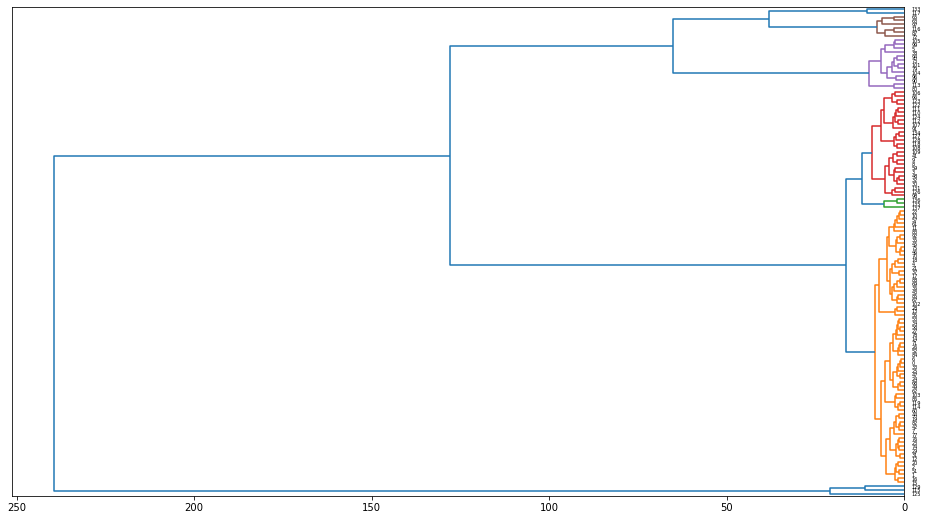

In [85]:
#générer la matrice des liens
Z = linkage(df0_std,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.figure(figsize=(16, 9))
dendrogram(Z,labels=df0_std.index,orientation='left',color_threshold= 10)

plt.show()

In [86]:
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

groupes_cah = fcluster(Z,t=100,criterion='distance')
print(groupes_cah)


[2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 3 3 2 2 2 2 2 3
 3 2 2 2 2 2 3 2 3 2 2 3 3 3 2 3 3 2 2 3 3 2 2 2 2 2 2 2 3 2 1 3 3 2 2 2 2
 2 1 2 2 2 1 2 3 2 2 2 2]


* Le CAH suggere 4 clusters, c'est vrai qu'avec 4 clusters on ne perd pas beaucoup en silhouette et on baisse encore l'inertie et c'est aussi un point d'inflexion.

## 4. Regles d'accosiation

In [87]:
#df.drop(columns=['cluster'],inplace=True)
df_categ

,AGE,TRAITTEST,SEX,BMI,HDLBL,LDLBL,TGBL,ALATBL,GGT(microkat/L)BL,ASATBL,BilirubineBL,SCOREBINLDL16sem,SCOREBINTG16sem
0,low,Placebo,F,low,high,low,low,low,low,low,low,MAUVAIS,BON
1,high,Drug,F,high,low,high,low,low,low,low,low,BON,MAUVAIS
2,low,Placebo,F,low,high,high,high,low,low,low,low,MAUVAIS,MAUVAIS
3,low,Placebo,F,high,low,high,high,low,low,low,low,MAUVAIS,BON
4,low,Drug,F,low,low,low,high,low,low,low,low,BON,BON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,high,Drug,F,low,high,high,low,high,high,high,high,BON,MAUVAIS
134,low,Placebo,M,high,low,low,high,high,low,high,high,MAUVAIS,MAUVAIS
135,low,Placebo,M,high,low,high,high,high,high,high,high,MAUVAIS,MAUVAIS
136,low,Drug,M,high,low,high,high,high,high,high,high,MAUVAIS,BON


In [88]:
TC=pd.get_dummies(df_categ)
TC

,AGE_low,AGE_high,TRAITTEST_Drug,TRAITTEST_Placebo,SEX_F,SEX_M,BMI_low,BMI_high,HDLBL_low,HDLBL_high,...,GGT(microkat/L)BL_low,GGT(microkat/L)BL_high,ASATBL_low,ASATBL_high,BilirubineBL_low,BilirubineBL_high,SCOREBINLDL16sem_BON,SCOREBINLDL16sem_MAUVAIS,SCOREBINTG16sem_BON,SCOREBINTG16sem_MAUVAIS
0,1,0,0,1,1,0,1,0,0,1,...,1,0,1,0,1,0,0,1,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1
2,1,0,0,1,1,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
3,1,0,0,1,1,0,0,1,1,0,...,1,0,1,0,1,0,0,1,1,0
4,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,1,1,0,0,1
134,1,0,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
135,1,0,0,1,0,1,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1
136,1,0,1,0,0,1,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0


In [89]:
from mlxtend.frequent_patterns import apriori

In [90]:
freq_itemsets = apriori(TC,min_support=0.03,max_len=4,use_colnames=True)
print(freq_itemsets)

        support  \
0      0.528455   
1      0.471545   
2      0.495935   
3      0.504065   
4      0.715447   
...         ...   
11815  0.065041   
11816  0.048780   
11817  0.097561   
11818  0.032520   
11819  0.130081   

                                                                                  itemsets  
0                                                                                (AGE_low)  
1                                                                               (AGE_high)  
2                                                                         (TRAITTEST_Drug)  
3                                                                      (TRAITTEST_Placebo)  
4                                                                                  (SEX_F)  
...                                                                                    ...  
11815   (ASATBL_high, BilirubineBL_low, SCOREBINLDL16sem_MAUVAIS, SCOREBINTG16sem_MAUVAIS)  
11816          (ASATBL_high

In [91]:
def is_inclus(x,items):
    return items.issubset(x)

id1 = np.where(freq_itemsets.itemsets.apply(is_inclus,items={"TRAITTEST_Drug"}))
id2 = np.where(freq_itemsets.itemsets.apply(is_inclus,items={"TRAITTEST_Placebo"}))
print(id1)
print(id2)
ff1=pd.DataFrame(freq_itemsets.loc[id1])
ff2=pd.DataFrame(freq_itemsets.loc[id2])
ff1.append(ff2,ignore_index=True)

(array([   2,   26,   50, ..., 6535, 6536, 6537], dtype=int64),)
(array([   3,   27,   51, ..., 7600, 7601, 7602], dtype=int64),)


,support,itemsets
0,0.495935,(TRAITTEST_Drug)
1,0.243902,"(TRAITTEST_Drug, AGE_low)"
2,0.252033,"(TRAITTEST_Drug, AGE_high)"
3,0.390244,"(TRAITTEST_Drug, SEX_F)"
4,0.105691,"(TRAITTEST_Drug, SEX_M)"
...,...,...
3451,0.065041,"(BilirubineBL_low, TRAITTEST_Placebo, SCOREBINLDL16sem_MAUVAIS, SCOREBINTG16sem_BON)"
3452,0.130081,"(BilirubineBL_low, TRAITTEST_Placebo, SCOREBINLDL16sem_MAUVAIS, SCOREBINTG16sem_MAUVAIS)"
3453,0.048780,"(BilirubineBL_high, TRAITTEST_Placebo, SCOREBINLDL16sem_BON, SCOREBINTG16sem_MAUVAIS)"
3454,0.056911,"(BilirubineBL_high, TRAITTEST_Placebo, SCOREBINLDL16sem_MAUVAIS, SCOREBINTG16sem_BON)"


In [92]:
#print(freq_itemsets.loc[id2])
#print(freq_itemsets.loc[id1])

In [93]:
from mlxtend.frequent_patterns import association_rules

In [94]:
regles = association_rules(freq_itemsets,metric="confidence",min_threshold=0.50)

In [95]:
#regles["antecedent_len"] = regles["antecedents"].apply(lambda x: len(x))
#regles

In [96]:
reg0=(regles[(regles['confidence'] > 0.8) &
       (regles['lift'] > 1.0) &
        (regles['antecedents'].ge({'TRAITTEST_Drug'}) | regles['consequents'].ge({'TRAITTEST_Drug'}))].sort_values(by='lift',ascending=False))
reg0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14908,"(TRAITTEST_Drug, ALATBL_high, SCOREBINLDL16sem_MAUVAIS)",(SCOREBINTG16sem_BON),0.040650,0.300813,0.032520,0.8,2.659459,0.020292,3.495935
13887,"(TRAITTEST_Drug, LDLBL_high, HDLBL_high)",(SCOREBINLDL16sem_BON),0.065041,0.479675,0.065041,1.0,2.084746,0.033842,inf
12830,"(TRAITTEST_Drug, LDLBL_high, SEX_M)",(TGBL_high),0.048780,0.479675,0.048780,1.0,2.084746,0.025382,inf
12846,"(TRAITTEST_Drug, TGBL_low, SEX_M)",(BilirubineBL_high),0.032520,0.479675,0.032520,1.0,2.084746,0.016921,inf
12861,"(TRAITTEST_Drug, BilirubineBL_low, SEX_M)",(TGBL_high),0.032520,0.479675,0.032520,1.0,2.084746,0.016921,inf
...,...,...,...,...,...,...,...,...,...
12561,"(TRAITTEST_Drug, ALATBL_low, SCOREBINTG16sem_BON)",(SEX_F),0.081301,0.715447,0.065041,0.8,1.118182,0.006874,1.422764
12477,"(TRAITTEST_Drug, BilirubineBL_high, TGBL_low)",(SEX_F),0.162602,0.715447,0.130081,0.8,1.118182,0.013748,1.422764
12619,"(TRAITTEST_Drug, GGT(microkat/L)BL_low, SCOREBINLDL16sem_MAUVAIS)",(SEX_F),0.081301,0.715447,0.065041,0.8,1.118182,0.006874,1.422764
12232,"(TRAITTEST_Drug, SCOREBINLDL16sem_BON, BMI_high)",(SEX_F),0.162602,0.715447,0.130081,0.8,1.118182,0.013748,1.422764


In [97]:
reg1=(regles[(regles['confidence'] > 0.8) &
       (regles['lift'] > 1.0) &
        (regles['antecedents'].ge({'TRAITTEST_Placebo'}) | regles['consequents'].ge({'TRAITTEST_Placebo'}))].sort_values(by='lift',ascending=False))
reg1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15941,"(GGT(microkat/L)BL_high, TRAITTEST_Placebo, SCOREBINTG16sem_BON)",(SEX_M),0.032520,0.284553,0.032520,1.0,3.514286,0.023267,inf
15865,"(GGT(microkat/L)BL_high, ALATBL_low, TRAITTEST_Placebo)",(SEX_M),0.040650,0.284553,0.032520,0.8,2.811429,0.020953,3.577236
9198,"(GGT(microkat/L)BL_low, SCOREBINLDL16sem_BON, TRAITTEST_Placebo)",(AGE_high),0.056911,0.471545,0.056911,1.0,2.120690,0.030075,inf
17730,"(GGT(microkat/L)BL_high, TRAITTEST_Placebo, SCOREBINTG16sem_BON)",(TGBL_high),0.032520,0.479675,0.032520,1.0,2.084746,0.016921,inf
17925,"(ALATBL_high, SCOREBINLDL16sem_BON, TRAITTEST_Placebo)",(GGT(microkat/L)BL_high),0.048780,0.479675,0.048780,1.0,2.084746,0.025382,inf
...,...,...,...,...,...,...,...,...,...
15288,"(TRAITTEST_Placebo, SCOREBINTG16sem_BON, HDLBL_high)",(SEX_F),0.081301,0.715447,0.065041,0.8,1.118182,0.006874,1.422764
15278,"(SCOREBINLDL16sem_BON, TRAITTEST_Placebo, HDLBL_high)",(SEX_F),0.040650,0.715447,0.032520,0.8,1.118182,0.003437,1.422764
15193,"(ASATBL_low, TRAITTEST_Placebo, BMI_high)",(SEX_F),0.081301,0.715447,0.065041,0.8,1.118182,0.006874,1.422764
8888,"(GGT(microkat/L)BL_high, TRAITTEST_Placebo, AGE_high)",(SEX_F),0.081301,0.715447,0.065041,0.8,1.118182,0.006874,1.422764


In [98]:
import seaborn as sns

In [99]:
# Convert antecedents and consequents into strings
regles['antecedents'] = regles['antecedents'].apply(lambda a: ','.join(list(a)))
regles['consequents'] = regles['consequents'].apply(lambda a: ','.join(list(a)))
# Print example.
print(regles[['antecedents','consequents']])


                                                              antecedents  \
0                                                       TRAITTEST_Placebo   
1                                                                 AGE_low   
2                                                                 AGE_low   
3                                                                   SEX_M   
4                                                                 BMI_low   
...                                                                   ...   
30545               SCOREBINTG16sem_MAUVAIS,BilirubineBL_high,ASATBL_high   
30546        SCOREBINTG16sem_MAUVAIS,SCOREBINLDL16sem_MAUVAIS,ASATBL_high   
30547  BilirubineBL_high,SCOREBINLDL16sem_MAUVAIS,SCOREBINTG16sem_MAUVAIS   
30548                                SCOREBINLDL16sem_MAUVAIS,ASATBL_high   
30549                          BilirubineBL_high,SCOREBINLDL16sem_MAUVAIS   

                                     consequents  
0                       

# PLACEBO

In [100]:
# Transform antecedent, consequent, and support columns into matrix
support_table_placebo = regles.pivot(index='consequents', columns='antecedents',values='support')
lift_table_placebo = regles.pivot(index='consequents', columns='antecedents',values='lift')
for cols in support_table_placebo.columns:
    if 'TRAITTEST_Placebo'  not in cols:
        support_table_placebo.drop(cols, axis=1,inplace=True)
        lift_table_placebo.drop(cols, axis=1,inplace=True)

In [101]:
support_table_placebo.columns

Index(['AGE_high,TRAITTEST_Placebo,SEX_F',
       'AGE_low,ASATBL_low,TRAITTEST_Placebo',
       'AGE_low,BilirubineBL_high,TRAITTEST_Placebo',
       'AGE_low,SCOREBINLDL16sem_BON,TRAITTEST_Placebo',
       'AGE_low,TRAITTEST_Placebo', 'AGE_low,TRAITTEST_Placebo,ASATBL_high',
       'AGE_low,TRAITTEST_Placebo,BMI_high',
       'AGE_low,TRAITTEST_Placebo,HDLBL_high',
       'AGE_low,TRAITTEST_Placebo,HDLBL_low',
       'AGE_low,TRAITTEST_Placebo,SCOREBINLDL16sem_MAUVAIS',
       ...
       'TRAITTEST_Placebo,SEX_M', 'TRAITTEST_Placebo,SEX_M,AGE_high',
       'TRAITTEST_Placebo,SEX_M,ASATBL_high',
       'TRAITTEST_Placebo,SEX_M,BMI_high',
       'TRAITTEST_Placebo,SEX_M,HDLBL_high',
       'TRAITTEST_Placebo,SEX_M,HDLBL_low',
       'TRAITTEST_Placebo,SEX_M,SCOREBINTG16sem_BON',
       'TRAITTEST_Placebo,SEX_M,SCOREBINTG16sem_MAUVAIS',
       'TRAITTEST_Placebo,SEX_M,TGBL_high', 'TRAITTEST_Placebo,TGBL_high'],
      dtype='object', name='antecedents', length=311)

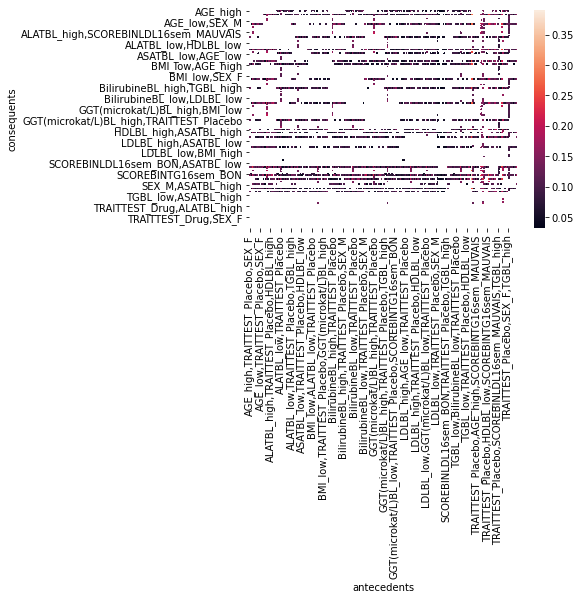

In [102]:
# Generate heatmap
sns.heatmap(support_table_placebo)
None

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

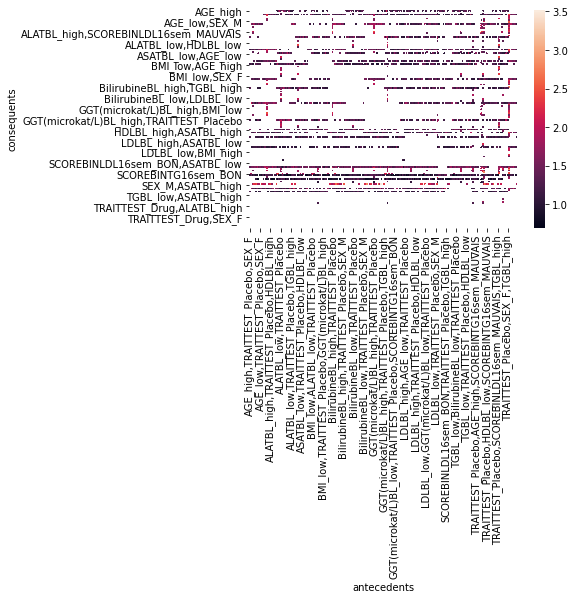

In [103]:
sns.heatmap(lift_table_placebo)

# DRUG

In [104]:
# Transform antecedent, consequent, and support columns into matrix
support_table_drug = regles.pivot(index='consequents', columns='antecedents',values='support')
lift_table_drug = regles.pivot(index='consequents', columns='antecedents',values='lift')
for cols in support_table_drug.columns:
    if 'TRAITTEST_Drug'  not in cols:
        support_table_drug.drop(cols, axis=1,inplace=True)
        lift_table_drug.drop(cols, axis=1,inplace=True)

support_table_drug.columns

Index(['BMI_low,ALATBL_high,TRAITTEST_Drug',
       'BMI_low,BilirubineBL_high,TRAITTEST_Drug',
       'BMI_low,HDLBL_low,TRAITTEST_Drug', 'BMI_low,SEX_M,TRAITTEST_Drug',
       'BMI_low,TRAITTEST_Drug,ASATBL_high',
       'BMI_low,TRAITTEST_Drug,SCOREBINTG16sem_BON',
       'BMI_low,TRAITTEST_Drug,TGBL_high',
       'BilirubineBL_low,ALATBL_high,TRAITTEST_Drug',
       'BilirubineBL_low,TRAITTEST_Drug,ASATBL_high',
       'GGT(microkat/L)BL_high,AGE_low,TRAITTEST_Drug',
       ...
       'TRAITTEST_Drug,TGBL_low,BilirubineBL_high',
       'TRAITTEST_Drug,TGBL_low,BilirubineBL_low',
       'TRAITTEST_Drug,TGBL_low,HDLBL_high',
       'TRAITTEST_Drug,TGBL_low,HDLBL_low',
       'TRAITTEST_Drug,TGBL_low,SCOREBINLDL16sem_BON',
       'TRAITTEST_Drug,TGBL_low,SCOREBINLDL16sem_MAUVAIS',
       'TRAITTEST_Drug,TGBL_low,SCOREBINTG16sem_BON',
       'TRAITTEST_Drug,TGBL_low,SCOREBINTG16sem_MAUVAIS',
       'TRAITTEST_Drug,TGBL_low,SEX_F', 'TRAITTEST_Drug,TGBL_low,SEX_M'],
      dtype='object',

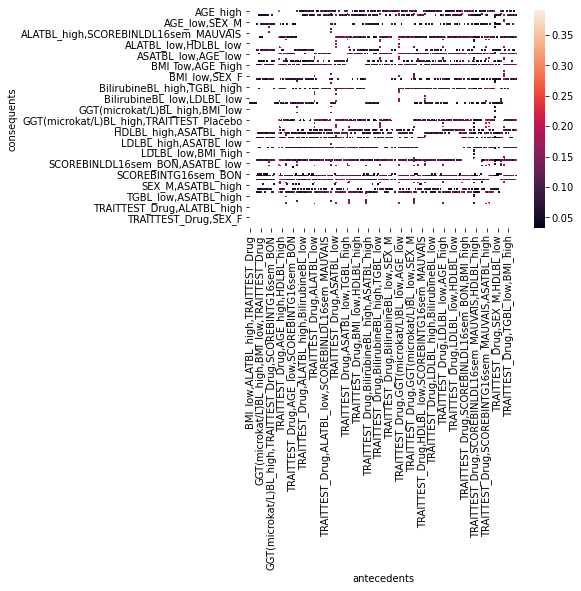

In [105]:
# Generate heatmap
sns.heatmap(support_table_drug)
None

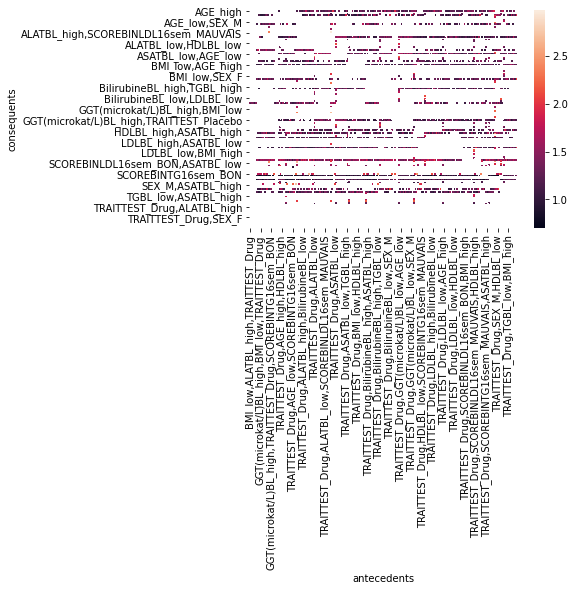

In [106]:
sns.heatmap(lift_table_drug)
None